In [270]:
!pip3 install seaborn

In [271]:
!pip3 install scikit-learn

In [272]:
!pip3 install --upgrade scikit-learn
!pip3 install imbalanced-learn
!pip3 install xgboost
!pip3 install statsmodels

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preproc
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [274]:
df = pd.read_csv('shared/complaints_25Nov21.csv')
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [275]:
df['Consumer disputed?'].value_counts(dropna = False, normalize = True)

Consumer disputed?
No     0.783349
Yes    0.216651
Name: proportion, dtype: float64

In [276]:
categorical_columns = ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID']
df[categorical_columns] = df[categorical_columns].astype('category')
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [277]:
print(df.dtypes)

Date received                   category
Product                         category
Sub-product                     category
Issue                           category
Sub-issue                       category
Consumer complaint narrative    category
Company public response         category
Company                         category
State                           category
ZIP code                        category
Tags                            category
Consumer consent provided?      category
Submitted via                   category
Date sent to company            category
Company response to consumer    category
Timely response?                category
Consumer disputed?              category
Complaint ID                    category
dtype: object


In [278]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Consumer_labels = le.fit_transform(df['Consumer disputed?'].values.ravel()) 
df['Consumer_labels'] = encoded_labels
del df['Consumer disputed?']
df.dropna()
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer_labels
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,2180490,0
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,1305453,0
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,1337613,0
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,393900,1
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,418647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,1390395,0
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,12192,1
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,118351,0
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,2138969,0


In [279]:
X = df.loc[:, df.columns != 'Consumer_labels']
y = df['Consumer_labels']
feature_names = df.loc[:, df.columns != 'Consumer_labels'].columns

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [281]:
from imblearn.under_sampling import RandomUnderSampler

In [282]:
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

In [283]:
y_train.value_counts()

Consumer_labels
0    44903
1    44903
Name: count, dtype: int64

In [284]:
y

0         0
1         0
2         0
3         1
4         0
         ..
207255    0
207256    1
207257    0
207258    0
207259    0
Name: Consumer_labels, Length: 207260, dtype: int64

In [285]:
X

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,2138969


In [286]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [287]:
model_xgb = XGBClassifier(random_state=123, enable_categorical=True)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [288]:
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     32377
           1       0.38      0.83      0.52      9075

    accuracy                           0.66     41452
   macro avg       0.65      0.72      0.63     41452
weighted avg       0.81      0.66      0.69     41452



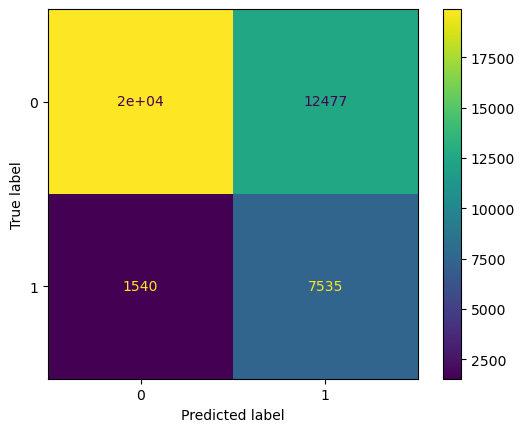

In [289]:
print(classification_report(y_test, pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [292]:
extra_diligence_cost = 90
default_non_disputed_cost = 100
default_disputed_cost = 600

total_cost_with_model = 0

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == 1: 
        total_cost_with_model += default_disputed_cost
    elif true_label == 0: 
        total_cost_with_model += default_non_disputed_cost
    elif true_label == 1 and predicted_label == 1:
        total_cost += extra_diligence_cost

print(f"Total cost to the banks without the model: ${total_cost_with_model}")

Total cost to the banks without the model: $8682700


In [293]:
cost_per_true_positive = 100  
cost_per_true_negative = 100  
cost_per_false_positive = 90  
cost_per_false_negative = 600  

total_cost = 0

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == 1 and predicted_label == 1:
        total_cost += cost_per_true_positive
    elif true_label == 0 and predicted_label == 0:
        total_cost += cost_per_true_negative
    elif true_label == 0 and predicted_label == 1:
        total_cost += cost_per_false_positive
    elif true_label == 1 and predicted_label == 0:
        total_cost += cost_per_false_negative

print(f"Total cost to the banks based on the model results: ${total_cost}")

Total cost to the banks based on the model results: $7632820


Confusion Matrix : 
 [[ 1508 30869]
 [    1  9074]]
Test accuracy =  0.2552832191450352
              precision    recall  f1-score   support

           0       1.00      0.05      0.09     32377
           1       0.23      1.00      0.37      9075

    accuracy                           0.26     41452
   macro avg       0.61      0.52      0.23     41452
weighted avg       0.83      0.26      0.15     41452



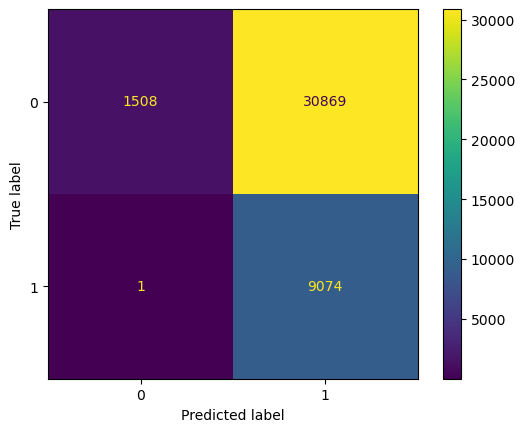

In [298]:
# Set threshold for identifying class 1
threshold = 0.1

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

In [297]:
import numpy as np

# Define a range of threshold values (e.g., 0.1 to 0.9)
threshold_values = np.arange(0.1, 1.0, 0.01)

lowest_total_cost = float('inf')  # Initialize with a large value

for threshold in threshold_values:
    # Classify observations based on the threshold
    y_pred_threshold = (y_pred >= threshold).astype(int)

    # Calculate the total cost for this threshold setting
    total_cost = 0
    for true_label, predicted_label in zip(y_test, y_pred_threshold):
        if true_label == 1 and predicted_label == 1:
            total_cost += cost_per_true_positive
        elif true_label == 0 and predicted_label == 0:
            total_cost += cost_per_true_negative
        elif true_label == 0 and predicted_label == 1:
            total_cost += cost_per_false_positive
        elif true_label == 1 and predicted_label == 0:
            total_cost += cost_per_false_negative

    # Update lowest_total_cost and the best threshold
    if total_cost < lowest_total_cost:
        lowest_total_cost = total_cost
        best_threshold = threshold

print(f"Lowest total cost to the banks: ${lowest_total_cost} (achieved with threshold {best_threshold})")

Lowest total cost to the banks: $7632820 (achieved with threshold 0.1)


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                 xytext=(-45, 0), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->"), color='green',fontsize=8)
plt.show()
